# Explore here

In [1]:
import pandas as pd
df = pd.read_csv('https://breathecode.herokuapp.com/asset/internal-link?id=929&path=medical_insurance_cost.csv')

df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   str    
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   str    
 5   region    1338 non-null   str    
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), str(3)
memory usage: 73.3 KB


In [3]:
df.to_csv('../data/raw/datos_crudos.csv')

In [4]:
df.duplicated().sum()

np.int64(1)

In [5]:
df[df.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [6]:
df = df.drop_duplicates().reset_index(drop=True)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830
1333,18,female,31.920,0,no,northeast,2205.98080
1334,18,female,36.850,0,no,southeast,1629.83350
1335,21,female,25.800,0,no,southwest,2007.94500


Se elimino un duplicado

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

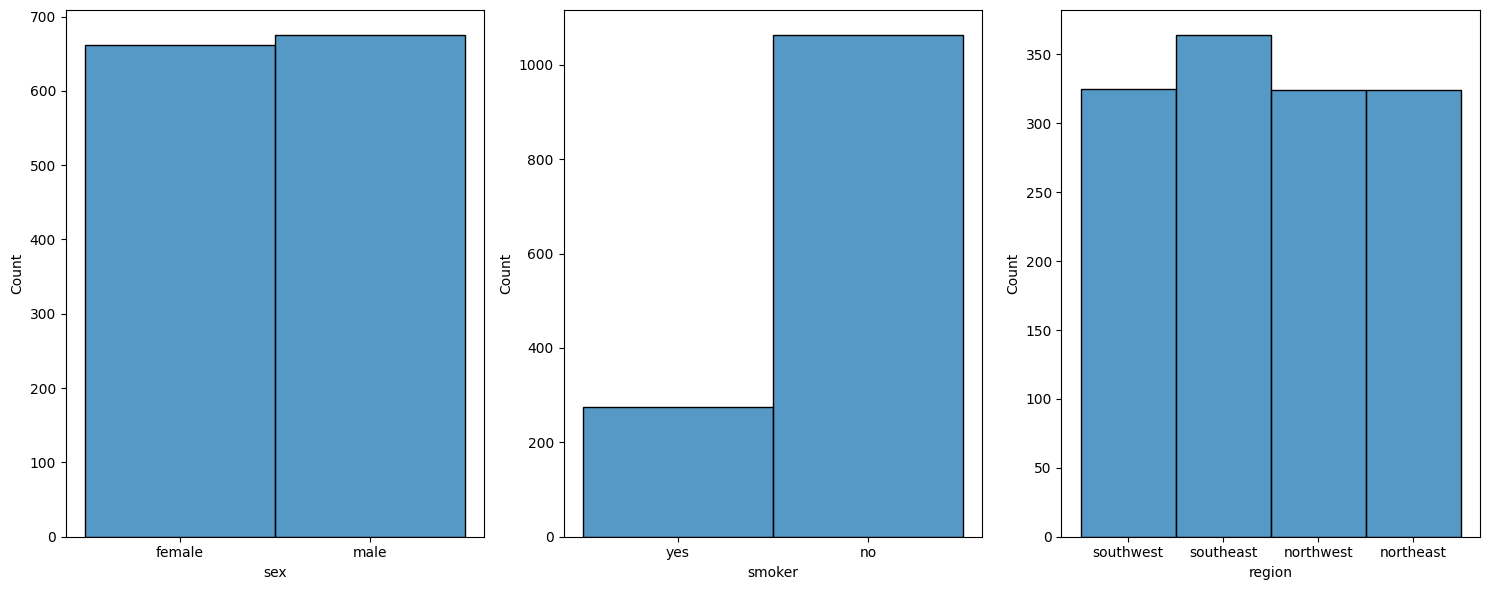

In [8]:
fig, axis= plt.subplots(1,3, figsize=(15,6))

sns.histplot(ax= axis[0], data = df, x = 'sex')
sns.histplot(ax= axis[1], data = df, x = 'smoker')
sns.histplot(ax= axis[2], data = df, x = 'region')

plt.tight_layout()
plt.show()

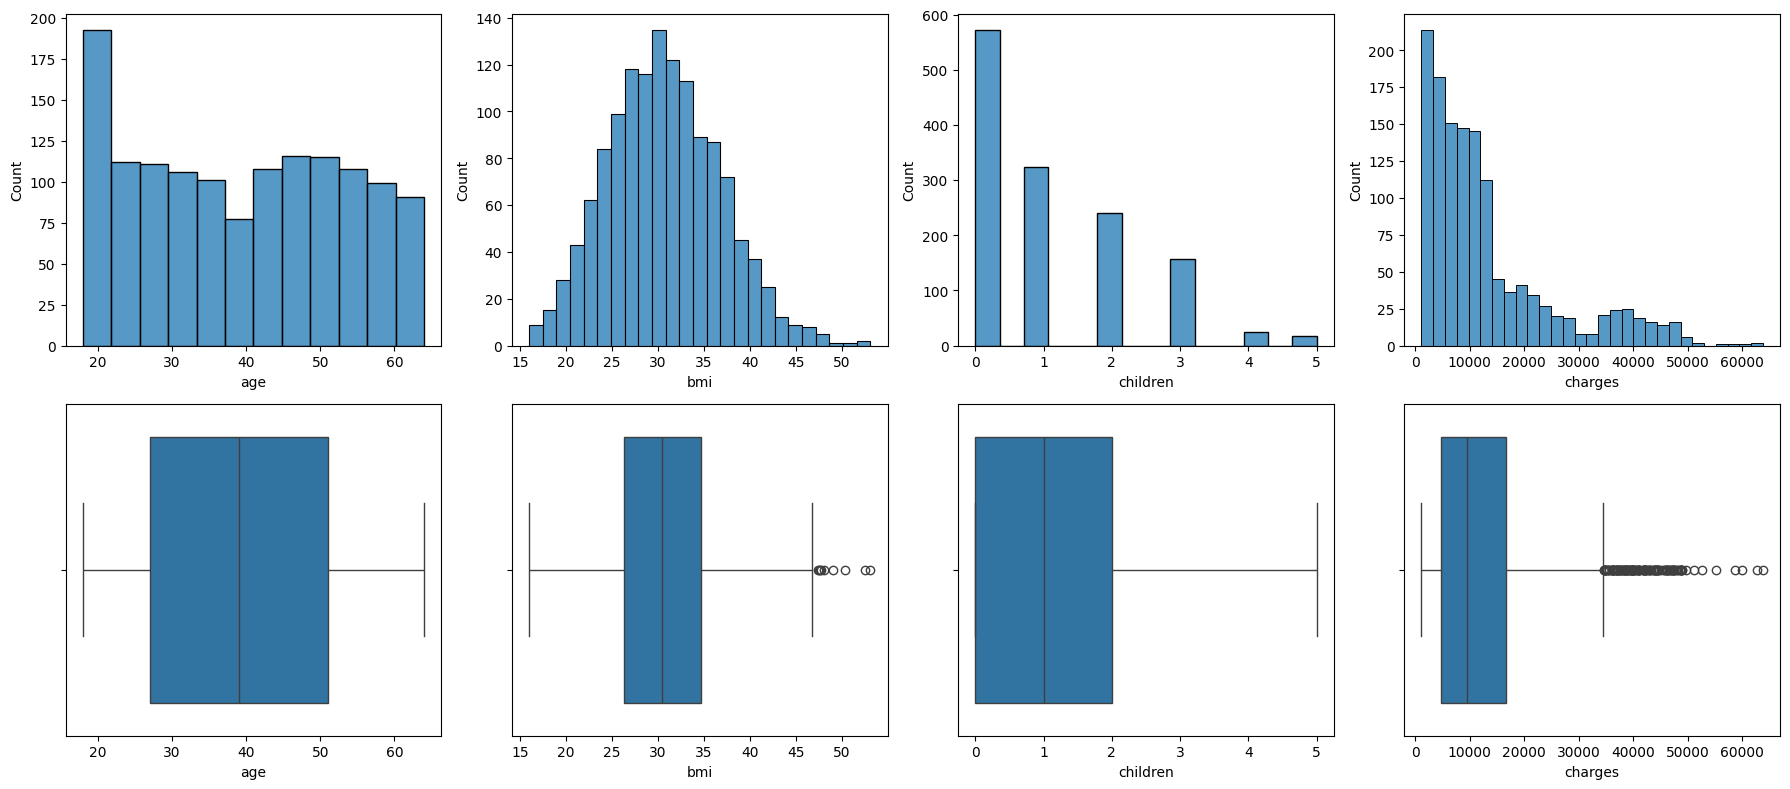

In [9]:
fig, axis = plt.subplots(2,4, figsize=(18,8))

sns.histplot(ax=axis[0,0], data =df, x= 'age')
sns.boxplot(ax=axis[1,0], data =df, x= 'age')
sns.histplot(ax=axis[0,1], data =df, x= 'bmi')
sns.boxplot(ax=axis[1,1], data =df, x= 'bmi')
sns.histplot(ax=axis[0,2], data =df, x= 'children')
sns.boxplot(ax=axis[1,2], data =df, x= 'children')
sns.histplot(ax=axis[0,3], data =df, x= 'charges')
sns.boxplot(ax=axis[1,3], data =df, x= 'charges')

plt.tight_layout()
plt.show()

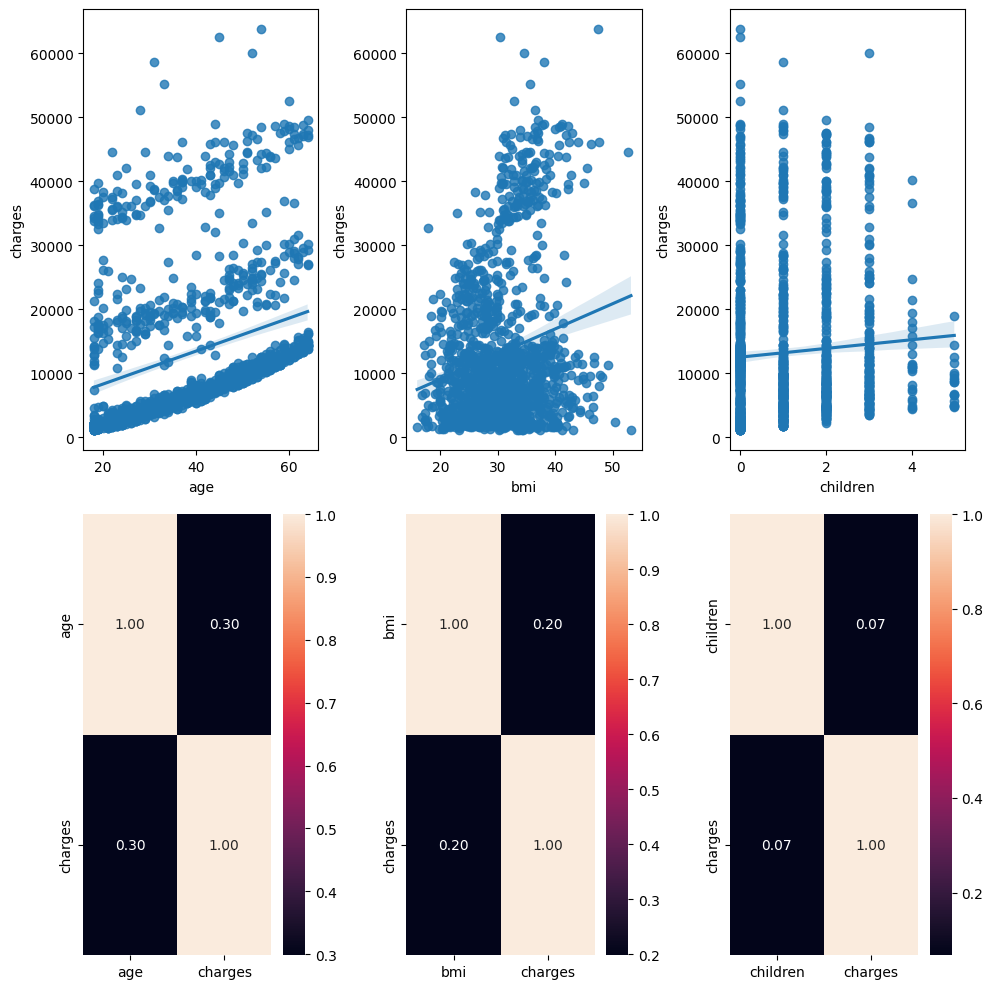

In [10]:
fig, axis = plt.subplots(2,3, figsize=(10,10))

sns.regplot(ax=axis[0,0], data= df, x = 'age', y = 'charges')
sns.heatmap(ax=axis[1,0], data= df[['age','charges']].corr(),annot=True, fmt=".2f")
sns.regplot(ax=axis[0,1], data= df, x = 'bmi', y = 'charges')
sns.heatmap(ax=axis[1,1], data= df[['bmi','charges']].corr(),annot=True, fmt=".2f")
sns.regplot(ax=axis[0,2], data= df, x = 'children', y = 'charges')
sns.heatmap(ax=axis[1,2], data= df[['children','charges']].corr(),annot=True, fmt=".2f")

plt.tight_layout()
plt.show()

Podemos ver que hay una relacion moderada en la Edad con la prima del seguro, mayor edad, mayor prima del seguro medico. Al igual que si es fumador, tiene una relacion moderada baja en la prima.
En cuanto a que tengan mas hijos no hay una relacion directa, o no hay influencia.

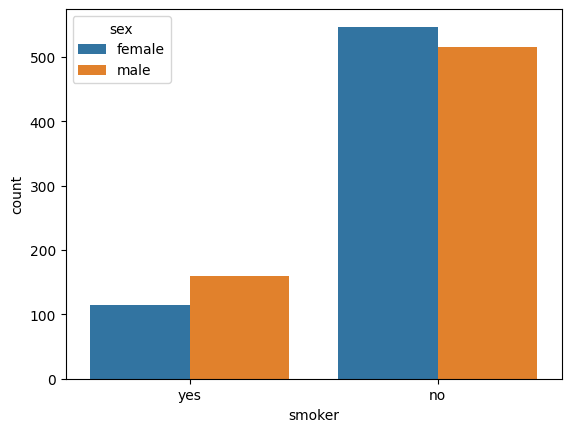

In [11]:
sns.countplot(data = df, x= 'smoker', hue='sex')
plt.show()

Hay un mayor porcentaje de hombres que fuman con respecto a las mujeres

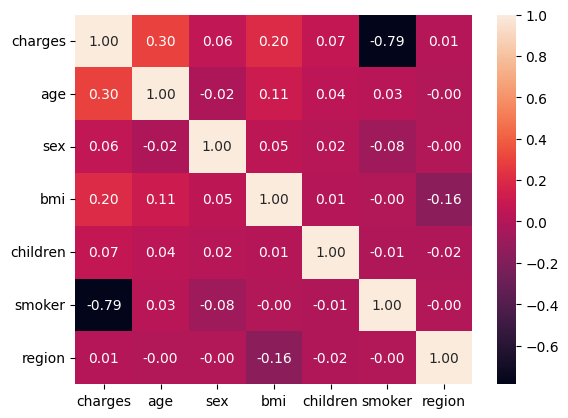

In [12]:
df['sex'] = pd.factorize(df['sex'])[0]
df['smoker'] = pd.factorize(df['smoker'])[0]
df['region'] = pd.factorize(df['region'])[0]

sns.heatmap(df[['charges','age','sex','bmi','children','smoker','region']].corr(),annot=True,fmt='.2f')
plt.show()

Se puede ver que ser fumador tiene una correlacion fuerte, aumenta de manera drastica el precio, es la correlacion mas alta. Luego sigue la edad con una correlacion moderada, a mayor edad mas caro el precio y por ultimo el bmi.
En cuanto a children, sex y region hay una correlacion casi nula o irrelevante.

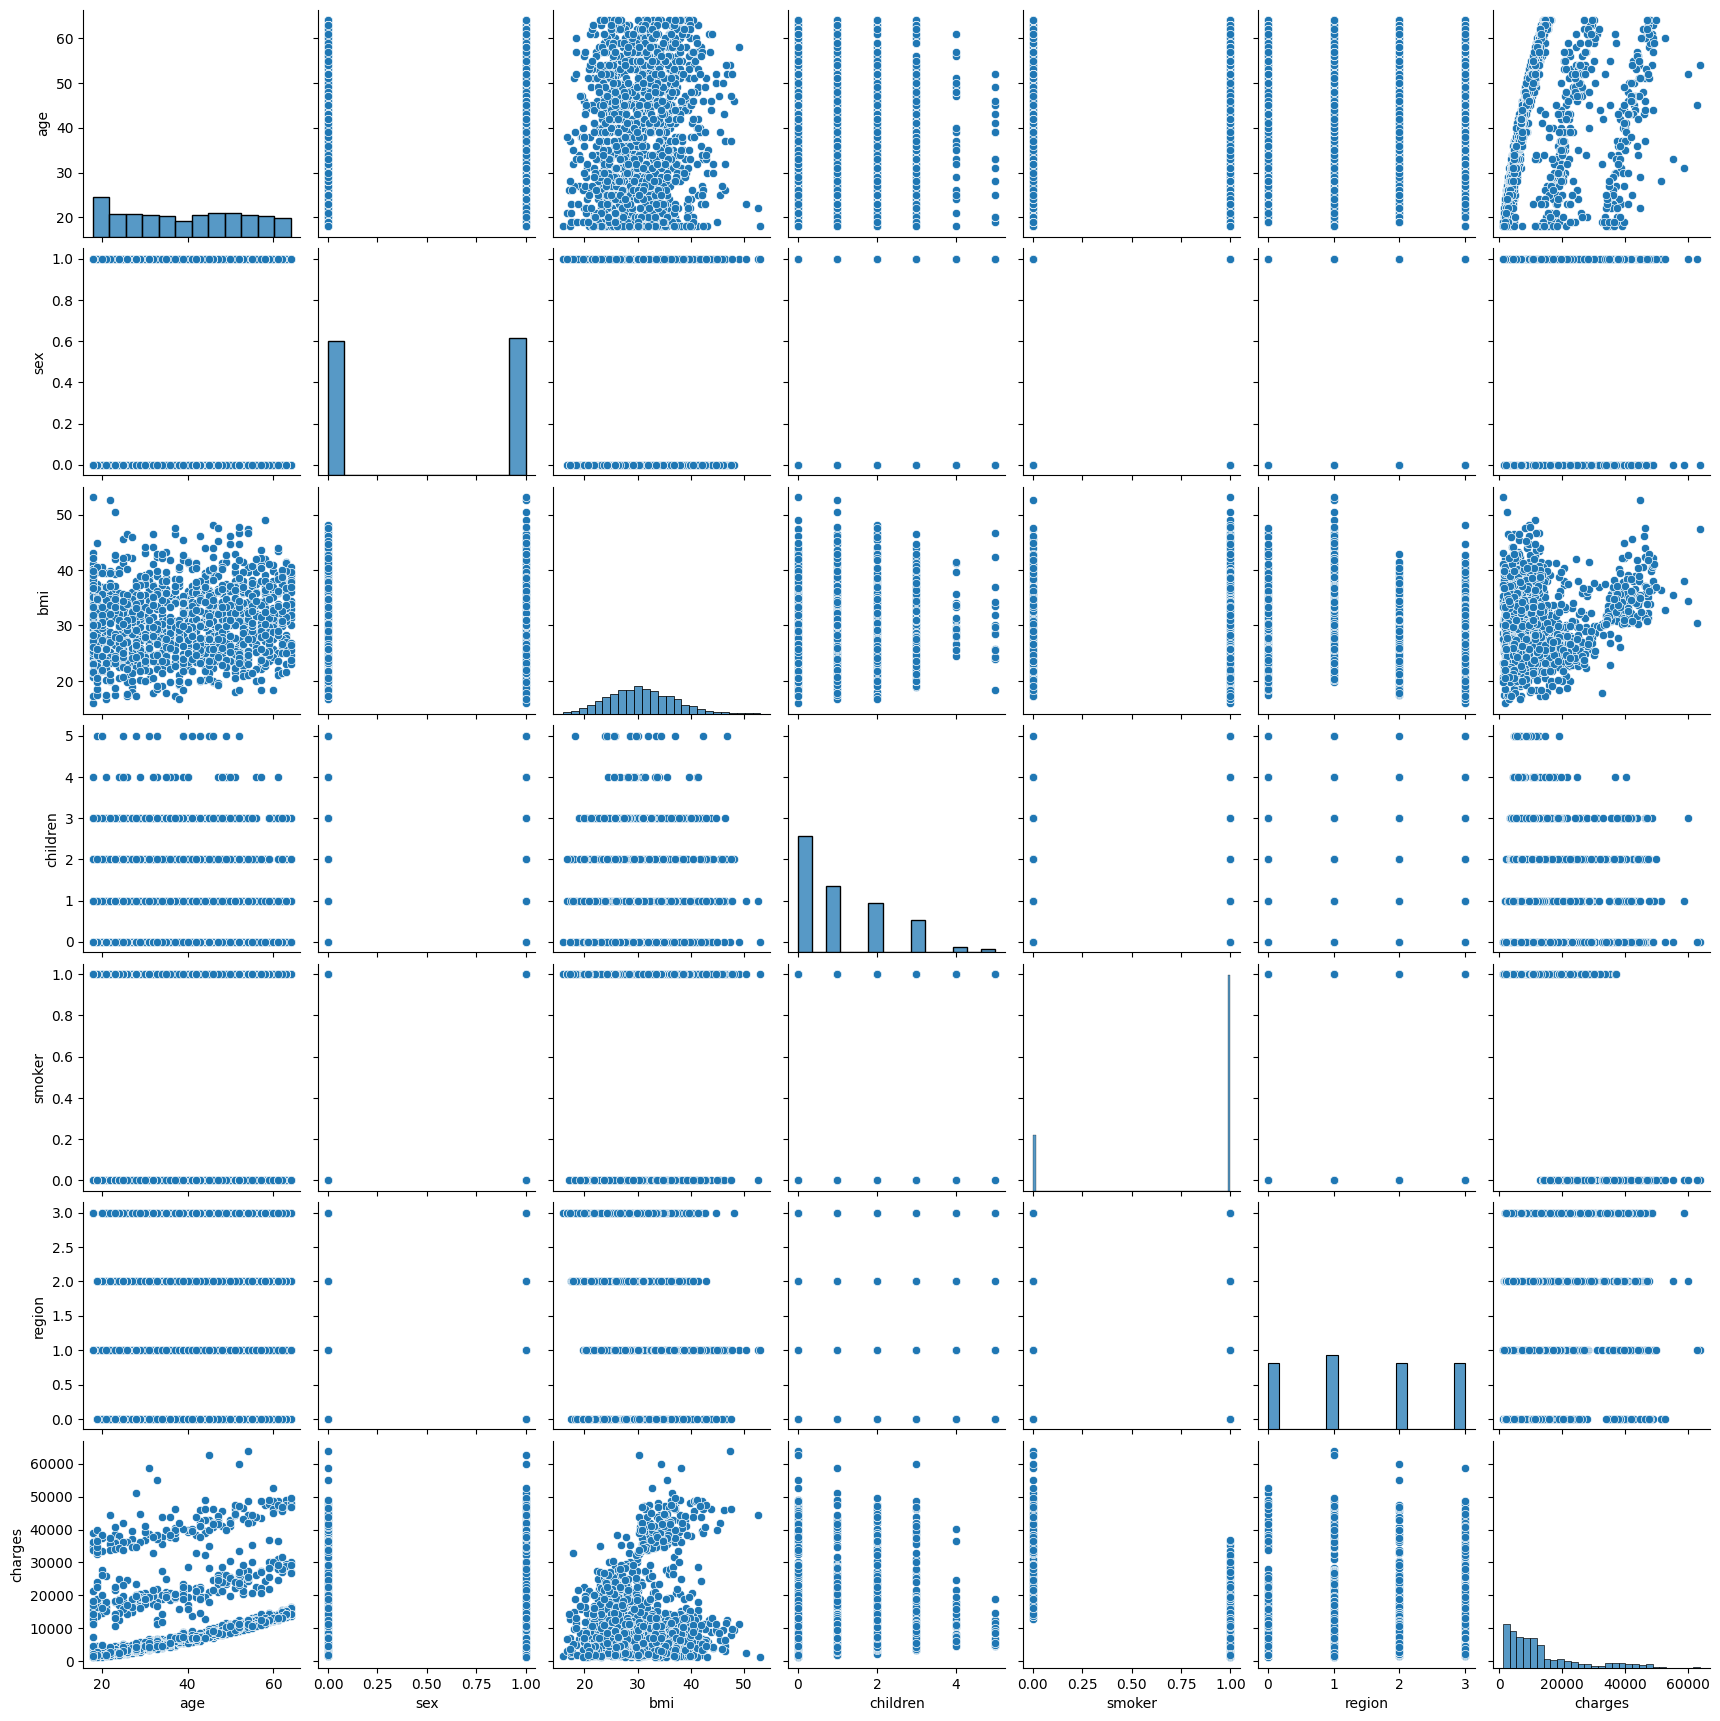

In [13]:
sns.pairplot(data=df)

In [14]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,0.795064,1.483919,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,1.105208,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,1.000000,1.000000,4746.344000
50%,39.000000,1.000000,30.400000,1.000000,1.000000,1.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,1.000000,2.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


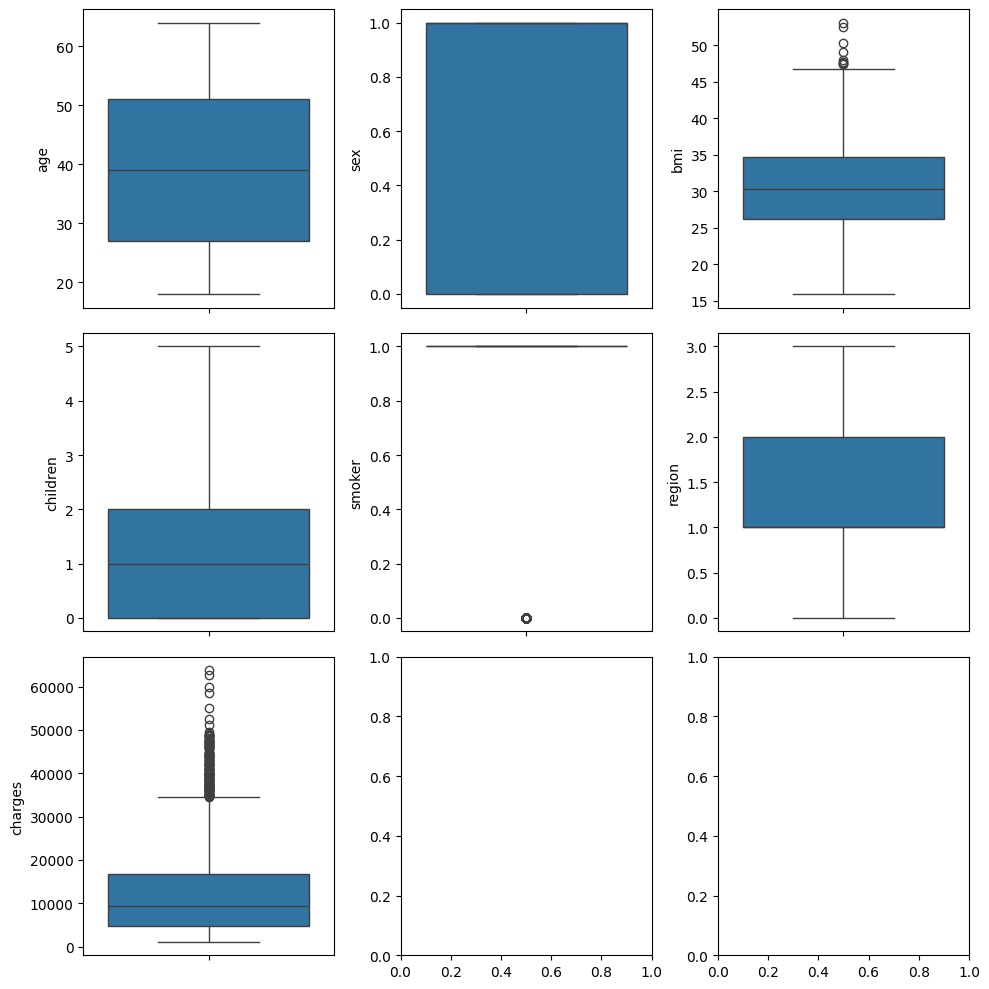

In [15]:
fig, axes = plt.subplots(3,3, figsize=(10,10))

sns.boxplot(ax=axes[0,0],data=df,y='age')
sns.boxplot(ax=axes[0,1],data=df,y='sex')
sns.boxplot(ax=axes[0,2],data=df,y='bmi')
sns.boxplot(ax=axes[1,0],data=df,y='children')
sns.boxplot(ax=axes[1,1],data=df,y='smoker')
sns.boxplot(ax=axes[1,2],data=df,y='region')
sns.boxplot(ax=axes[2,0],data=df,y='charges')

plt.tight_layout()
plt.show()

Se detectan outliers significativos en la variable objetivo, los cuales no representan errores, sino la naturaleza del riesgo médico de fumadores y pacientes con condiciones de salud combinadas.

In [16]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No hay valores nulos

In [23]:
from sklearn.preprocessing import MinMaxScaler

num_variables = ['age','sex','bmi','children','smoker','region']

scaler = MinMaxScaler()
columnas_escaladas = scaler.fit_transform(df[num_variables])
df_escalado = pd.DataFrame(columnas_escaladas,index=df.index,columns = num_variables)
df_escalado['charges'] = df['charges']

df_escalado

,age,sex,bmi,children,smoker,region,charges
0,0.021739,0.0,0.321227,0.0,0.0,0.000000,16884.92400
1,0.000000,1.0,0.479150,0.2,1.0,0.333333,1725.55230
2,0.217391,1.0,0.458434,0.6,1.0,0.333333,4449.46200
3,0.326087,1.0,0.181464,0.0,1.0,0.666667,21984.47061
4,0.304348,1.0,0.347592,0.0,1.0,0.666667,3866.85520
...,...,...,...,...,...,...,...
1332,0.695652,1.0,0.403820,0.6,1.0,0.666667,10600.54830
1333,0.000000,0.0,0.429379,0.0,1.0,1.000000,2205.98080
1334,0.000000,0.0,0.562012,0.0,1.0,0.333333,1629.83350
1335,0.065217,0.0,0.264730,0.0,1.0,0.000000,2007.94500


In [19]:
from sklearn.model_selection import train_test_split

X = df.drop('charges', axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
X_train.info()

<class 'pandas.DataFrame'>
Index: 1069 entries, 1113 to 1126
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1069 non-null   int64  
 1   sex       1069 non-null   int64  
 2   bmi       1069 non-null   float64
 3   children  1069 non-null   int64  
 4   smoker    1069 non-null   int64  
 5   region    1069 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 58.5 KB


In [22]:
escalador = MinMaxScaler()

X_train_esc = escalador.fit_transform(X_train, y_train)
X_test_esc = escalador.transform(X_test)

X_train_esc = pd.DataFrame(X_train_esc, index = X_train.index, columns= X_train.columns)
X_test_esc = pd.DataFrame(X_test_esc, index = X_test.index, columns= X_test.columns)

X_test_esc

,age,sex,bmi,children,smoker,region
899,0.673913,1.0,0.176352,0.0,1.0,1.000000
1063,0.239130,0.0,0.259349,0.8,1.0,0.000000
1255,0.717391,0.0,0.549502,0.6,1.0,0.666667
298,0.282609,1.0,0.495830,0.6,0.0,0.666667
237,0.282609,1.0,0.603444,0.4,1.0,0.333333
...,...,...,...,...,...,...
534,1.000000,1.0,0.659672,0.0,1.0,0.333333
542,0.978261,0.0,0.547215,0.0,1.0,0.333333
759,0.086957,0.0,0.500942,0.4,1.0,1.000000
1283,0.934783,1.0,0.547215,0.2,0.0,0.000000


In [24]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [25]:
print(f"Intercepto (a):{model.intercept_}")
print(f"Coeficientes (b1, b2): {model.coef_}")

Intercepto (a):11291.590752555696
Coeficientes (b1, b2): [   248.76407134    -99.69539417    312.60904469    534.12087654
 -23052.15275173    237.62514748]


In [26]:
y_pred = model.predict(X_test)
y_pred

array([ 8.08045019e+03,  5.59287112e+03,  1.43782987e+04,  3.17318195e+04,
        9.15835694e+03,  1.33610143e+04,  3.02576553e+04,  1.30864736e+03,
        1.08494254e+04,  1.13755485e+04,  1.04822214e+04,  3.31558608e+04,
        3.09123841e+04,  1.71688443e+04,  1.06361393e+04,  9.37424715e+03,
        3.96524338e+03,  3.19229863e+04,  3.08468457e+03,  5.47544373e+03,
        3.76844305e+03,  3.01552667e+04,  1.50768984e+04,  3.02746510e+04,
        3.10830548e+04,  5.52001772e+03,  3.56655758e+04,  3.63713163e+04,
        1.12979802e+04,  1.40664742e+04,  6.37519963e+03,  1.29381095e+04,
        6.79284837e+02,  1.19476924e+04,  3.97832706e+04,  1.21517558e+04,
        4.57717842e+03,  4.01652351e+03,  3.11475453e+04,  9.22301501e+03,
        6.86852604e+03,  3.00358113e+04,  3.49732855e+04,  1.21709787e+04,
        7.46262777e+03,  3.27014535e+03,  6.02195905e+03,  8.81742438e+03,
        4.32171874e+03,  9.25718479e+03,  6.82679737e+03,  1.18887556e+04,
        3.11350727e+04,  

In [30]:
from sklearn.metrics import root_mean_squared_error, r2_score

print(f"Error cuadrático medio: {root_mean_squared_error(y_test, y_pred)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")

Error cuadrático medio: 5957.608799816459
Coeficiente de determinación: 0.8068466322629112
